# NOTCH1 and C/EBP$\beta$ Switching Circuit

In [1]:
import numpy as np
from scipy.integrate import odeint
from pylab import *
from scipy.optimize import fsolve

## Fig. 3(b): NOTCH1 is High and C/EBP$\beta$ is low 

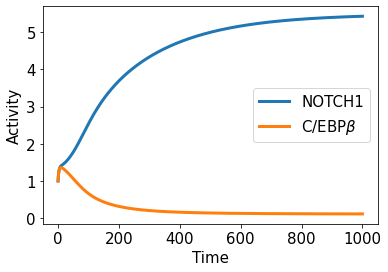

In [2]:
def notch_switch(x,t,val):
    N,C,T,I = x
    if(t>500):
        val = 0.1
    dN = b1/(1+C**n)+rt*T - dn*N
    dC = b2/(1+N**n)+ri*I - dc*C
    dT = pt*N - dt*T
    dI = pi*C - di*I
    return dN, dC,dT,dI
#Params
init = [1,1,1,1]
b1 = 0.5
b2 = 0.5
n = 2
dn = 0.2
dc = 0.2
pt = 0.01
pi = 0.01
g = 0.9
dt = 0.01 # dt<di -> NOTCH1>CEBPb 
di = 0.02
rt = 0.11
ri = 0.11

val = 0.01
t = np.arange(0,1000,0.01)
z= odeint(notch_switch,init,t,args=(val,))
plot(t,z[:,0],'C0',lw=3,label='NOTCH1')
plot(t,z[:,1],'C1',lw=3, label=r'C/EBP$\beta$')
legend(fontsize=15)
#legend()
xlabel('Time',fontsize=15)
ylabel('Activity',fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)
#savefig('NOTCH1_High_CEBPb_Low.png', dpi=600)
show()

## Fig. 4(a): NOTCH1, TGF-$\beta$ are High, and C/EBP$\beta$, IL1-$\alpha$ is low, 

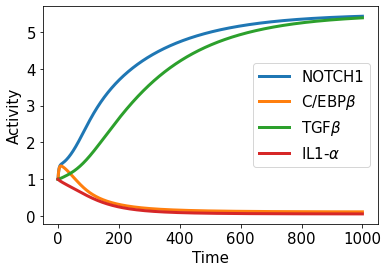

In [3]:
dt = 0.01 # dt<di -> NOTCH1>CEBPb 
di = 0.02
z= odeint(notch_switch,init,t,args=(val,))
plot(t,z[:,0],'C0',lw=3,label='NOTCH1')
plot(t,z[:,1],'C1',lw=3, label=r'C/EBP$\beta$')
plot(t,z[:,2],'C2',lw=3, label=r'TGF$\beta$')
plot(t,z[:,3],'C3',lw=3, label=r'IL1-$\alpha$')
legend(fontsize=15)
#legend()
xlabel('Time',fontsize=15)
ylabel('Activity',fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)
#savefig('CEBPb_IL1a_Low_NOTCH1_TGFb_High.png', dpi=600)
show()

## Fig. 4(b): C/EBP$\beta$, IL1-$\alpha$ is high, NOTCH1, TGF-$\beta$ are low

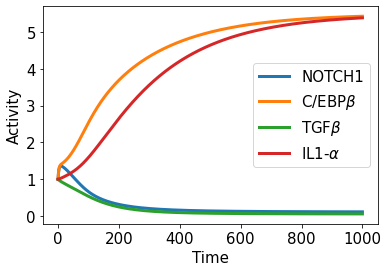

In [4]:
dt = 0.02 # dt<di -> NOTCH1>CEBPb 
di = 0.01
z= odeint(notch_switch,init,t,args=(val,))
plot(t,z[:,0],'C0',lw=3,label='NOTCH1')
plot(t,z[:,1],'C1',lw=3, label=r'C/EBP$\beta$')
plot(t,z[:,2],'C2',lw=3, label=r'TGF$\beta$')
plot(t,z[:,3],'C3',lw=3, label=r'IL1-$\alpha$')
legend(fontsize=15)
#legend()
xlabel('Time',fontsize=15)
ylabel('Activity',fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)
#savefig('CEBPb_IL1a_High_NOTCH1_TGFb_Low.png', dpi=600)
show()

## Fig. 4(c): State Transitions

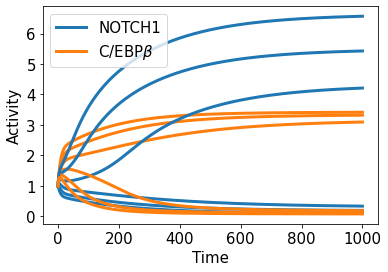

In [5]:
dt = 0.01 # dt<di -> NOTCH1>CEBPb 
di = 0.02
for i in arange(0.1,0.7,0.1):
    b1 = i
    z= odeint(notch_switch,init,t, (0.1,))
    plot(t,z[:,0],'C0',lw=3)
    plot(t,z[:,1],'C1',lw=3)
legend(['NOTCH1',r'C/EBP$\beta$'],fontsize=15)
xlabel('Time',fontsize=15)
ylabel('Activity',fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)
#savefig('CEBPb_NOTCH1_Bistability.png', dpi=600)
show()

## Nullcline Analysis

## Fig. 4(d) NOTCH1 and C/EBP $\beta$ Two Stable State, Parameters:  $d_T$= 0.01 and $d_I$=0.01

/tmp/ipykernel_10487/4256281940.py:34: RuntimeWarning: invalid value encountered in sqrt
  C_nc = (b2/(C*(dc-ri*pi/di))-1)**(1/n)


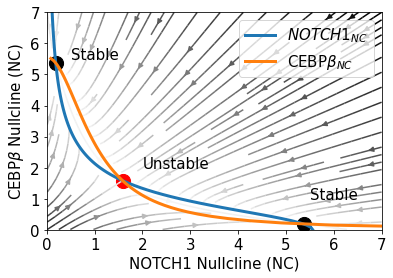

In [6]:
def senescence_switching_dynamics(x,t):
    N,C = x    
    dN = b1/(1+C**n)+rt*pt*N/dt - dn*N
    dC = b2/(1+N**n)+ri*pi*C/di - dc*C

    return dN, dC

#Params
ini_tpm = [1,1]
b1 = 0.5
b2 = 0.5
n = 2
dn = 0.2
dc = 0.2
pt = 0.01
pi = 0.01
dt = 0.01 # dt<di -> NOTCH1>CEBPb 
di = 0.01
rt = 0.11
ri = 0.11

t = np.arange(0,100,0.01)

def Rss(x):
    return [b1/(1+x[1]**n)+rt*pt*x[0]/dt - dn*x[0], b2/(1+x[0]**n)+ri*pi*x[1]/di - dc*x[1]]

npts = 100
Nmin = 0.01; Nmax = 7.0
Cmin = 0.01; Cmax = 7.0
N = np.linspace(Nmin,Nmax,npts)
C = np.linspace(Cmin, Cmax, npts)

N_nc = (b1/(1+C**2)) / (dn-rt*pt/dt)
C_nc = (b2/(C*(dc-ri*pi/di))-1)**(1/n)

plt.plot(N_nc, C, label=r'$NOTCH1_{NC}$', lw=3)
plt.plot(C_nc, C, label=r'CEBP$\beta$$_{NC}$', lw=3)

sol1 = fsolve(Rss, [1,5])
plt.scatter(sol1[0], sol1[1], s=200,c='k')
sol2 = fsolve(Rss, [2,2])
plt.scatter(sol2[0], sol2[1], s=200,c='r')
sol3 = fsolve(Rss, [5,1])
plt.scatter(sol3[0], sol3[1], s=200,c='k')

Not, Ceb = np.meshgrid(N,C)
dN, dC = senescence_switching_dynamics([Not, Ceb], 0.0)
norm = np.sqrt(dN**2 + dC**2)
sp = plt.streamplot(Not, Ceb, dN, dC, color=norm, cmap=plt.cm.binary, density = 1)
xlabel('NOTCH1 Nullcline (NC)', size=15)
ylabel(r'CEBP$\beta$ Nullcline (NC)', size=15)
xlim([0,Nmax])
ylim([0,Cmax])
xticks(size=15)
yticks(size=15)
text(2,2,'Unstable',fontsize=15)
text(0.5,5.5,'Stable',fontsize=15)
text(5.5,1,'Stable',fontsize=15)
legend(loc='upper right', fontsize=15)
#savefig('Nullcline_dt_0.01_di_0.01.png', dpi=600)
plt.show()

## Fig. 4(e) C/EBP $\beta$ Stable State, Parameters:  $d_T$= 0.04 and $d_I$=0.01

/tmp/ipykernel_10487/1930566697.py:34: RuntimeWarning: invalid value encountered in sqrt
  C_nc = (b2/(C*(dc-ri*pi/di))-1)**(1/n)


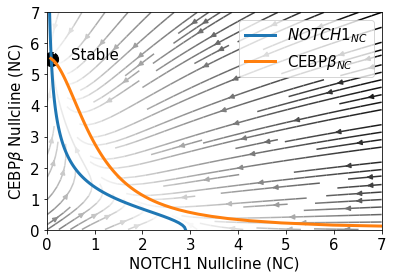

In [7]:
def senescence_switching_dynamics(x,t):
    N,C = x    
    dN = b1/(1+C**n)+rt*pt*N/dt - dn*N
    dC = b2/(1+N**n)+ri*pi*C/di - dc*C

    return dN, dC

#Params
ini_tpm = [1,1]
b1 = 0.5
b2 = 0.5
n = 2
dn = 0.2
dc = 0.2
pt = 0.01
pi = 0.01
dt = 0.04 # dt<di -> NOTCH1>CEBPb 
di = 0.01
rt = 0.11
ri = 0.11

t = np.arange(0,100,0.01)

def Rss(x):
    return [b1/(1+x[1]**n)+rt*pt*x[0]/dt - dn*x[0], b2/(1+x[0]**n)+ri*pi*x[1]/di - dc*x[1]]

npts = 100
Nmin = 0.01; Nmax = 7.0
Cmin = 0.01; Cmax = 7.0
N = np.linspace(Nmin,Nmax,npts)
C = np.linspace(Cmin, Cmax, npts)

N_nc = (b1/(1+C**2)) / (dn-rt*pt/dt)
C_nc = (b2/(C*(dc-ri*pi/di))-1)**(1/n)

plt.plot(N_nc, C, label=r'$NOTCH1_{NC}$', lw=3)
plt.plot(C_nc, C, label=r'CEBP$\beta$$_{NC}$', lw=3)

sol1 = fsolve(Rss, [1,5])
plt.scatter(sol1[0], sol1[1], s=200,c='k')

Not, Ceb = np.meshgrid(N,C)
dN, dC = senescence_switching_dynamics([Not, Ceb], 0.0)
norm = np.sqrt(dN**2 + dC**2)
sp = plt.streamplot(Not, Ceb, dN, dC, color=norm, cmap=plt.cm.binary, density = 1)
xlabel('NOTCH1 Nullcline (NC)', size=15)
ylabel(r'CEBP$\beta$ Nullcline (NC)', size=15)
xlim([0,Nmax])
ylim([0,Cmax])
xticks(size=15)
yticks(size=15)
#text(3,4,'dt=di=0.1',bbox=dict(facecolor='white', alpha=1),fontsize=15)
#text(2,2,'Unstable',fontsize=15)
text(0.5,5.5,'Stable',fontsize=15)
#text(5.5,1,'Stable',fontsize=15)
legend(loc='upper right', fontsize=15)
#savefig('Nullcline_dt_0.01_di_0.04.png', dpi=600)
plt.show()

## Fig. 4(f) NOTCH1 Stable State, Parameters:  $d_T$= 0.01 and $d_I$=0.04

/tmp/ipykernel_10487/3627202494.py:34: RuntimeWarning: invalid value encountered in sqrt
  C_nc = (b2/(C*(dc-ri*pi/di))-1)**(1/n)


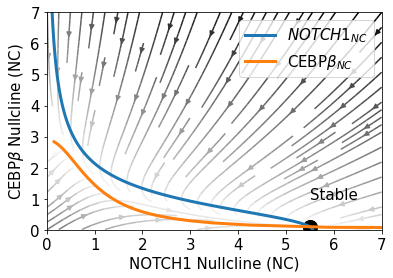

In [8]:
def senescence_switching_dynamics(x,t):
    N,C = x    
    dN = b1/(1+C**n)+rt*pt*N/dt - dn*N
    dC = b2/(1+N**n)+ri*pi*C/di - dc*C

    return dN, dC

#Params
ini_tpm = [1,1]
b1 = 0.5
b2 = 0.5
n = 2
dn = 0.2
dc = 0.2
pt = 0.01
pi = 0.01
dt = 0.01 # dt<di -> NOTCH1>CEBPb 
di = 0.04
rt = 0.11
ri = 0.11

t = np.arange(0,100,0.01)

def Rss(x):
    return [b1/(1+x[1]**n)+rt*pt*x[0]/dt - dn*x[0], b2/(1+x[0]**n)+ri*pi*x[1]/di - dc*x[1]]

npts = 100
Nmin = 0.01; Nmax = 7.0
Cmin = 0.01; Cmax = 7.0
N = np.linspace(Nmin,Nmax,npts)
C = np.linspace(Cmin, Cmax, npts)

N_nc = (b1/(1+C**2)) / (dn-rt*pt/dt)
C_nc = (b2/(C*(dc-ri*pi/di))-1)**(1/n)

plt.plot(N_nc, C, label=r'$NOTCH1_{NC}$', lw=3)
plt.plot(C_nc, C, label=r'CEBP$\beta$$_{NC}$', lw=3)

sol3 = fsolve(Rss, [5,1])
plt.scatter(sol3[0], sol3[1], s=200,c='k')

Not, Ceb = np.meshgrid(N,C)
dN, dC = senescence_switching_dynamics([Not, Ceb], 0.0)
norm = np.sqrt(dN**2 + dC**2)
sp = plt.streamplot(Not, Ceb, dN, dC, color=norm, cmap=plt.cm.binary, density = 1)
xlabel('NOTCH1 Nullcline (NC)', size=15)
ylabel(r'CEBP$\beta$ Nullcline (NC)', size=15)
xlim([0,Nmax])
ylim([0,Cmax])
xticks(size=15)
yticks(size=15)
text(5.5,1,'Stable',fontsize=15)
legend(loc='upper right', fontsize=15)
#savefig('Nullcline_dt_0.01_di_0.04.png', dpi=600)
plt.show()

## Below code is not implemented in the manuscript

#### Negative regulation of downstream IRAK1 by miR-146 a/b

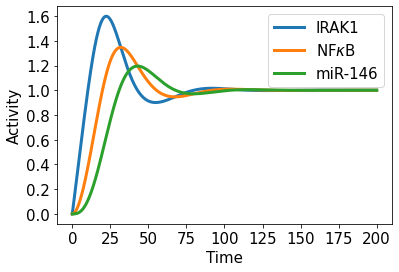

In [9]:
def nfloop(x,t):
    IRAK1, NFkB, miR146 = x
    
    dIRAK1_dt = ki - kd*IRAK1*miR146
    dNFkB_dt = kn*IRAK1 - kd*NFkB
    dmiR146_dt = km*NFkB - kd*miR146
    
    return dIRAK1_dt, dNFkB_dt, dmiR146_dt

#Parameters

ki = 0.1
kn = 0.1
km = 0.1

kd = 0.1

ini = [0,0,0]
t = np.arange(0,200,0.01)
z = odeint(nfloop,ini,t)
plot(t,z,lw=3)
legend([r'IRAK1','NF$\kappa$B','miR-146'], fontsize=15)
xlabel('Time',fontsize=15)
ylabel('Activity',fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)
#savefig('IRAK1 by miR-146.png', dpi=600)

show()